In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from stingray import Powerspectrum, Multitaper, Lightcurve, plot_dB
from scipy import signal

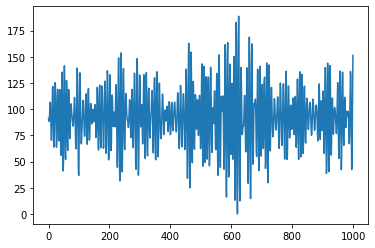

In [7]:
np.random.seed(100) # For consistency
coeff = np.array([2.7607, -3.8106, 2.6535, -0.9238])
ar4 = np.r_[1, -coeff] # For use with scipy.signal
N = 1000


freq, h = signal.freqz(b=1.0, a=ar4, worN=N, fs=1) #True PSD of AR(4)
psd = (h * h.conj()).real

psd = 10 * np.log10(psd)

data = signal.lfilter([1.0], ar4, np.random.randn(N)) # 1000 AR(4) data samples
data += abs(data.min()) # stingray.Powerspectrum does not accept negative values
times = np.arange(N)

lc2 = Lightcurve(time=times, counts=data)
lc2.plot()

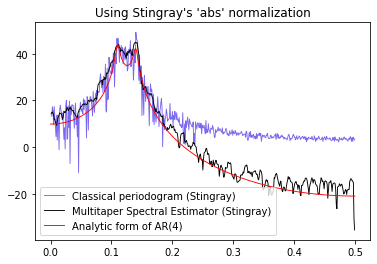

In [8]:
ps = Powerspectrum(lc2, norm='abs')
mtp = Multitaper(lc2, norm='abs', adaptive=True, Fs=1)

ps_dB = 10 * np.log10(ps.power)
mtp_dB = 10 * np.log10(mtp.power)

fig = plt.figure()
plt.title("Using Stingray's 'abs' normalization")
plt.plot(ps.freq, ps_dB, label='Classical periodogram (Stingray)', color='mediumslateblue', linewidth=.9)
plt.plot(mtp.freq, mtp_dB, label='Multitaper Spectral Estimator (Stingray)', color='black', linewidth=.9)
plt.plot(freq, psd, label='Analytic form of AR(4)', color='red', linewidth=.9)
leg = plt.legend()
plt.savefig("Stingray_abs_norm.png")

/home/dhruv/miniconda3/envs/stingray/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


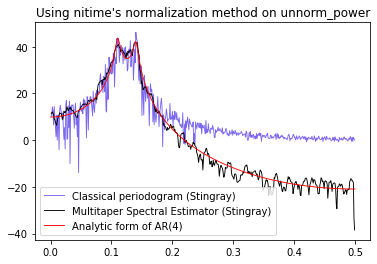

In [9]:
Fs = 1
custom_norm_ps = ps.unnorm_power / (Fs * data.shape[-1])    # Normalizing as per nitime gives a better fit
custom_norm_mtp = mtp.unnorm_power / (Fs * data.shape[-1])  # Than using Stingray's 'abs' norm

ps_dB = 10 * np.log10(custom_norm_ps)
mtp_dB = 10 * np.log10(custom_norm_mtp)

fig = plt.figure()
plt.title("Using nitime's normalization method on unnorm_power")
plt.plot(ps.freq, ps_dB, label='Classical periodogram (Stingray)', color='mediumslateblue', linewidth=.9)
plt.plot(mtp.freq, mtp_dB, label='Multitaper Spectral Estimator (Stingray)', color='black', linewidth=.9)
plt.plot(freq, psd, label='Analytic form of AR(4)', color='red', linewidth=.9)
leg = plt.legend()
plt.savefig("nitime_norm.png")